In [1]:
import pandas as pd
df1 = pd.read_csv('/home/stamatis/Desktop/etled_temperature_data.csv')
df2 = pd.read_csv('/home/stamatis/Desktop/etled_food_data.csv')

In [2]:
merged_df = pd.merge(df1, df2, on='year_code')

In [3]:
print(df1.columns)
print(df2.columns)

Index(['year_code', 'avg_prcp', 'avg_tavg', 'max_tmax', 'min_tmin',
       'avg_temp_diff'],
      dtype='object')
Index(['year_code', 'element_name', 'item_name', 'total_value'], dtype='object')


In [4]:
merged_df

,year_code,avg_prcp,avg_tavg,max_tmax,min_tmin,avg_temp_diff,element_name,item_name,total_value
0,2003,1.804110,5.871781,33.6,-18.2,15.477260,Yield,"Almonds, in shell",35325
1,2003,1.804110,5.871781,33.6,-18.2,15.477260,Yield,Apples,253215
2,2003,1.804110,5.871781,33.6,-18.2,15.477260,Yield,Apricots,132242
3,2003,1.804110,5.871781,33.6,-18.2,15.477260,Yield,Artichokes,157113
4,2003,1.804110,5.871781,33.6,-18.2,15.477260,Yield,Asparagus,35616
...,...,...,...,...,...,...,...,...,...
1913,2021,1.987945,7.189041,30.8,-14.7,12.871507,Yield,Tomatoes,959045
1914,2021,1.987945,7.189041,30.8,-14.7,12.871507,Yield,Unmanufactured tobacco,24470
1915,2021,1.987945,7.189041,30.8,-14.7,12.871507,Yield,"Walnuts, in shell",41672
1916,2021,1.987945,7.189041,30.8,-14.7,12.871507,Yield,Watermelons,384989


In [5]:
# calculate the correlation coefficients between temperature and production variables
temp_cols = ['avg_prcp', 'avg_tavg', 'max_tmax', 'min_tmin','avg_temp_diff']
corr_values = merged_df[temp_cols + ['total_value']].corr()

# display the correlation matrix
print(corr_values)

               avg_prcp  avg_tavg  max_tmax  min_tmin  avg_temp_diff  \
avg_prcp       1.000000 -0.256196 -0.199949  0.044704      -0.258964   
avg_tavg      -0.256196  1.000000  0.154756  0.663369      -0.380330   
max_tmax      -0.199949  0.154756  1.000000  0.207266       0.675494   
min_tmin       0.044704  0.663369  0.207266  1.000000      -0.061568   
avg_temp_diff -0.258964 -0.380330  0.675494 -0.061568       1.000000   
total_value   -0.001609  0.010792 -0.008436  0.001422      -0.012875   

               total_value  
avg_prcp         -0.001609  
avg_tavg          0.010792  
max_tmax         -0.008436  
min_tmin          0.001422  
avg_temp_diff    -0.012875  
total_value       1.000000  


I want to see how the prcp variable affects the total_value and show it by year


Bad key "text.kerning_factor" on line 4 in
/home/stamatis/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


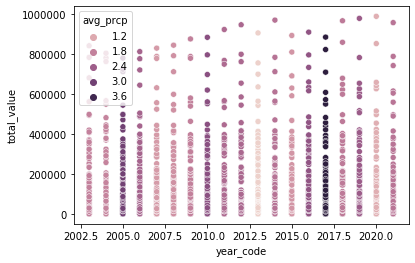

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='year_code', y='total_value', hue='avg_prcp', data=merged_df)
plt.show()

I want to see how the different item_name's total value is flactuating during the year_code


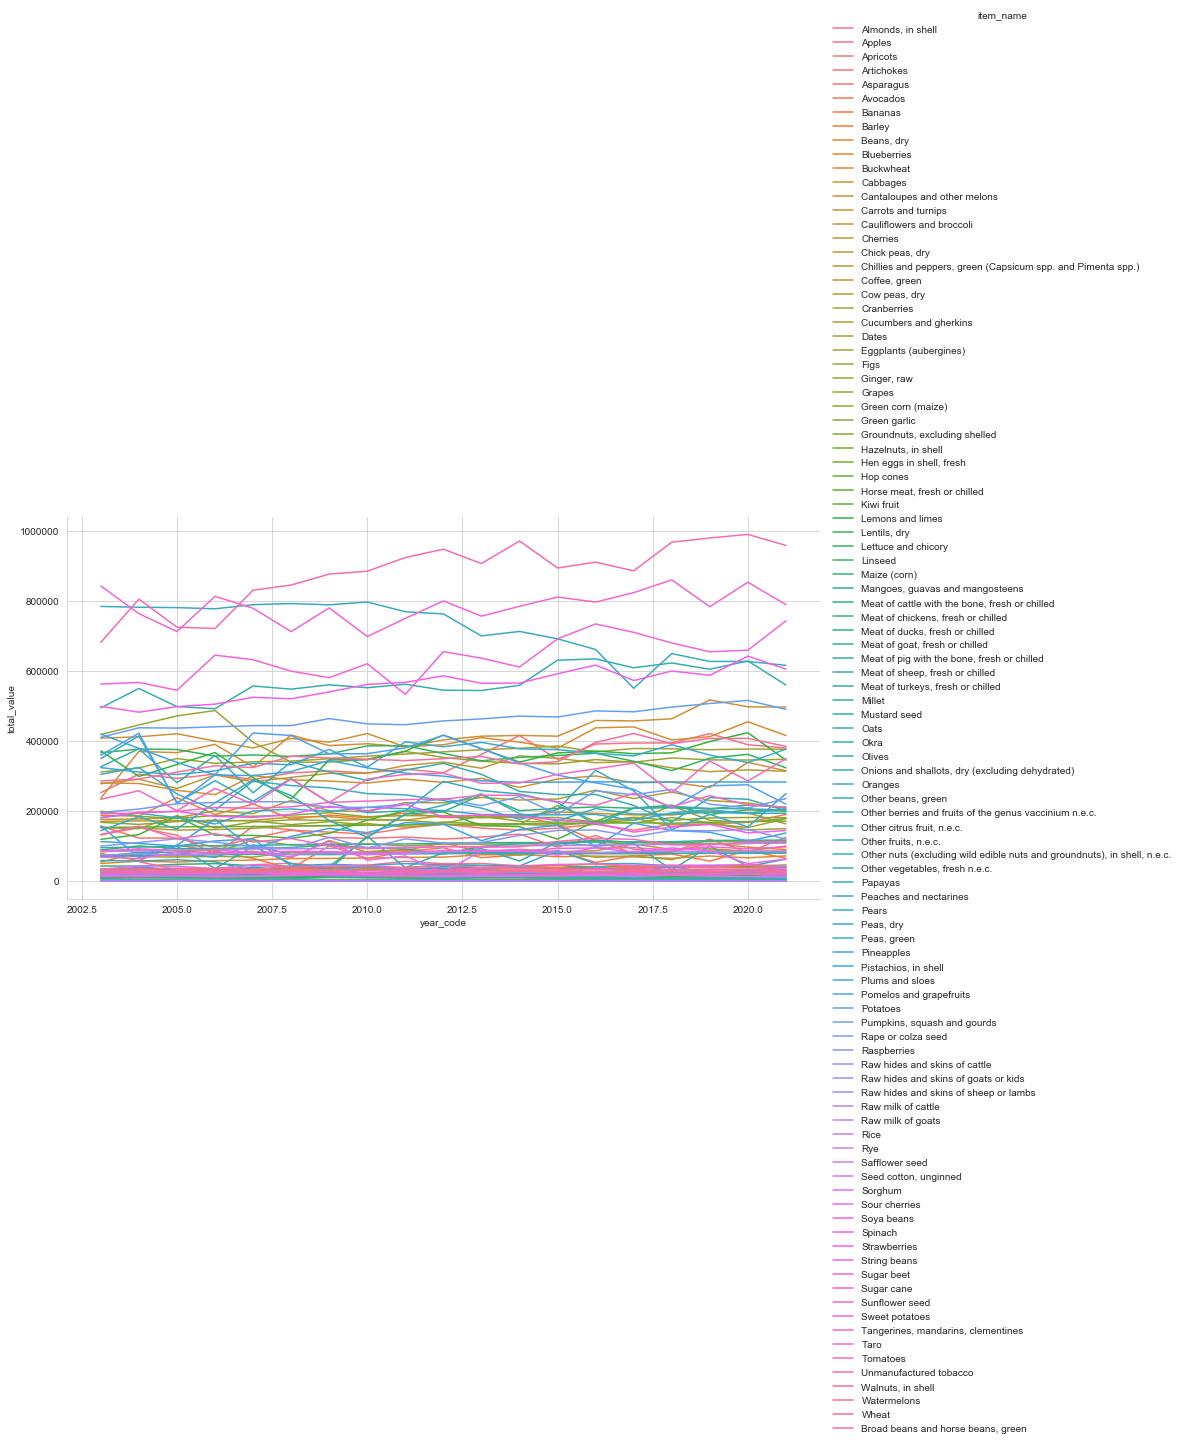

In [7]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("husl")

sns.relplot(data=merged_df, x="year_code", y="total_value", hue="item_name", kind="line", height=6, aspect=2)

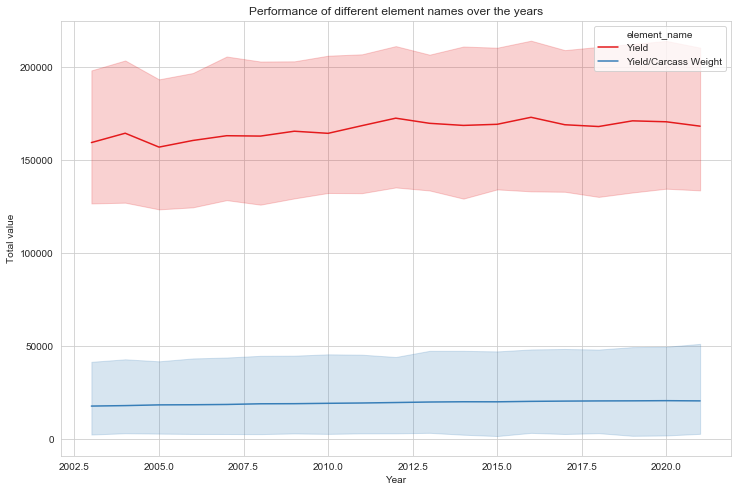

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot to show the performance of different element names over the years
plt.figure(figsize=(12, 8))
sns.lineplot(x='year_code', y='total_value', hue='element_name', data=merged_df)
plt.title('Performance of different element names over the years')
plt.xlabel('Year')
plt.ylabel('Total value')
plt.show()

Temperatures

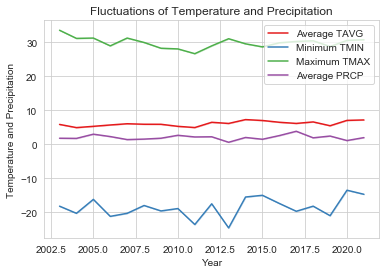

In [8]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set1')

# Create a line plot for tavg
sns.lineplot(data=merged_df, x='year_code', y='avg_tavg', label='Average TAVG')

# Create a line plot for tmin
sns.lineplot(data=merged_df, x='year_code', y='min_tmin', label='Minimum TMIN')

# Create a line plot for tmax
sns.lineplot(data=merged_df, x='year_code', y='max_tmax', label='Maximum TMAX')

# Create a line plot for prcp
sns.lineplot(data=merged_df, x='year_code', y='avg_prcp', label='Average PRCP')

# Set plot title and axis labels
plt.title('Fluctuations of Temperature and Precipitation')
plt.xlabel('Year')
plt.ylabel('Temperature and Precipitation')

# Display the plot
plt.show()

total value

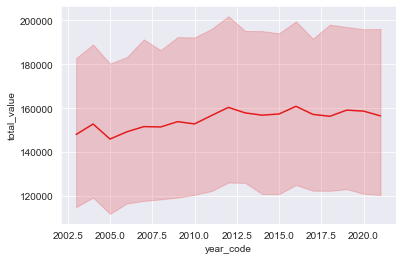

In [9]:
import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(x="year_code", y="total_value", data=merged_df)

merged

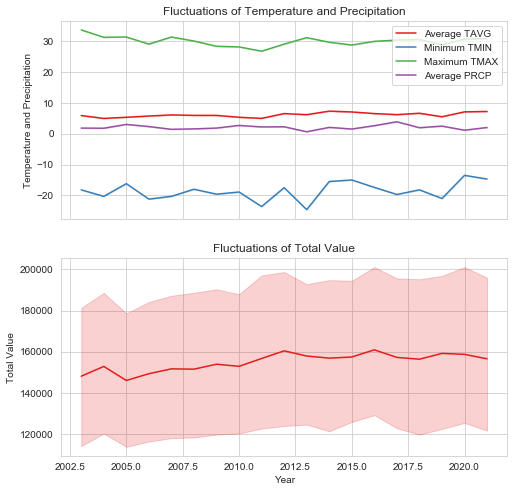

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and palette
sns.set_style('whitegrid')
sns.set_palette('Set1')

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8))

# Create line plots for temperature and precipitation
sns.lineplot(data=merged_df, x='year_code', y='avg_tavg', label='Average TAVG', ax=ax1)
sns.lineplot(data=merged_df, x='year_code', y='min_tmin', label='Minimum TMIN', ax=ax1)
sns.lineplot(data=merged_df, x='year_code', y='max_tmax', label='Maximum TMAX', ax=ax1)
sns.lineplot(data=merged_df, x='year_code', y='avg_prcp', label='Average PRCP', ax=ax1)

# Set axis labels and title for the first subplot
ax1.set_xlabel('')
ax1.set_ylabel('Temperature and Precipitation')
ax1.set_title('Fluctuations of Temperature and Precipitation')

# Create line plot for total value
sns.lineplot(x="year_code", y="total_value", data=merged_df, ax=ax2)

# Set axis labels and title for the second subplot
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Value')
ax2.set_title('Fluctuations of Total Value')

# Show the plot
plt.show()

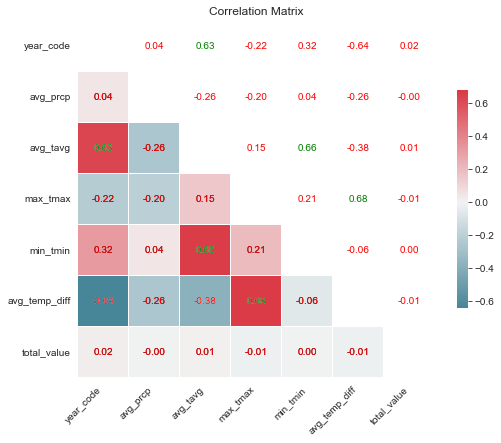

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = merged_df.corr()



# Set up the color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a mask for the lower triangle of the matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8))

# Create the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Correlation Matrix')

# Set the cell colors based on the correlation values
thresh = 0.5
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if i == j:
            ax.text(i + 0.5, j + 0.5, "{:.2f}".format(corr.iloc[i, j]),
                    ha="center", va="center", color="white")
        else:
            color = "red" if corr.iloc[i, j] < thresh else "green"
            ax.text(i + 0.5, j + 0.5, "{:.2f}".format(corr.iloc[i, j]),
                    ha="center", va="center", color=color)
            
plt.show()

